In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_pickle('rterg_summary.pkl')

# fixes now implemented in main code
df=df.rename(columns={"Lat.":"Lat", "Long.":"Long","Ehf/Tr^3":"Ehf_Tr3"})
#df["Eventname"] = str(int(df["Eventname"])).zfill(8)   # convert to string with leading zeros
df["iMag"]=pd.to_numeric(df["iMag"], errors='coerce', downcast='float')   # to float (was str)
df.tail()

,Eventname,oTime,Lat,Long,Depth,Me,Txo,Ehf,Ebb,Mehf,Ehf_Tr3,Nstats,iMagType,SRC,iMag,TACER_HF,TACER_BB,Comment,mTime,iteration
5011,21030701,2021-03-07 04:53:59+00:00,-37.18,179.63,10,5.68,68,3.7e+12,7.6e+12,5.94,1.2e+07,39,M,US,5.5,37,37,NaN,2021-03-07 05:23:04+00:00,6
5012,21030702,2021-03-07 19:28:47+00:00,-28.54,-177.01,10,5.54,84,2.1e+12,4.6e+12,5.78,3.5e+06,37,M,US,5.5,27,31,NaN,2021-03-07 20:00:42+00:00,6
5013,21030703,2021-03-07 23:56:56+00:00,-29.6,-177.03,10,5.88,65,8.6e+12,1.5e+13,6.19,3.2e+07,46,M,US,5.6,34.5,34,NaN,2021-03-08 00:33:27+00:00,6
5014,21030800,2021-03-08 12:56:34+00:00,-4.43,100.98,10,5.28,85,1e+12,1.9e+12,5.56,1.6e+06,48,M,US,5.5,38.5,64,NaN,2021-03-08 13:27:39+00:00,6
5015,09021102,2009-02-11 17:34:54+00:00,3.82,126.84,54,7.25,55,4.1e+14,1.7e+15,7.31,2.5e+09,66,Mo,AT,7.4,NaN,NaN,NaN,2009-02-11 18:08:08+00:00,A


# Resize so plots are larger

In [16]:
import matplotlib 
matplotlib.rcParams['figure.figsize'] = [20,10]

## Me vs Mehf

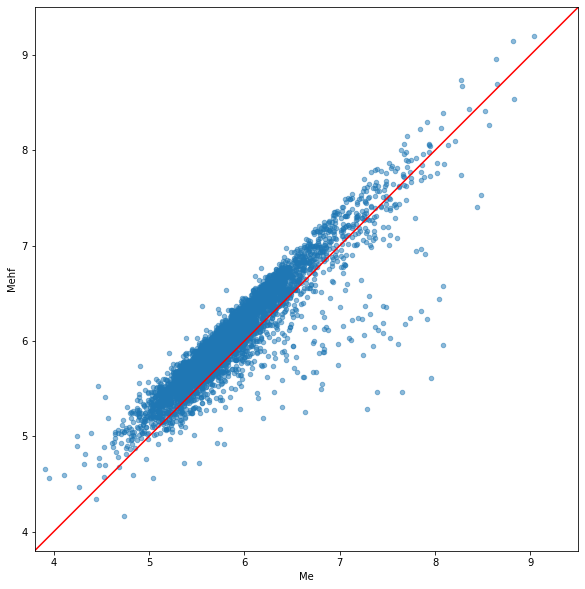

<Figure size 4000x4000 with 0 Axes>

In [17]:
ax = df.plot.scatter(x='Me',y='Mehf',alpha=0.5,xlim=[3.8,9.5],ylim=[3.8,9.5])
ax.set_aspect('equal', adjustable='box') # create square 
unity=np.linspace(1,10)
plt.plot(unity,unity,'r-')
plt.figure(figsize=(20,20), dpi= 200, facecolor='w', edgecolor='k')
plt.show()

## Me vs Mi
new vs. initial report

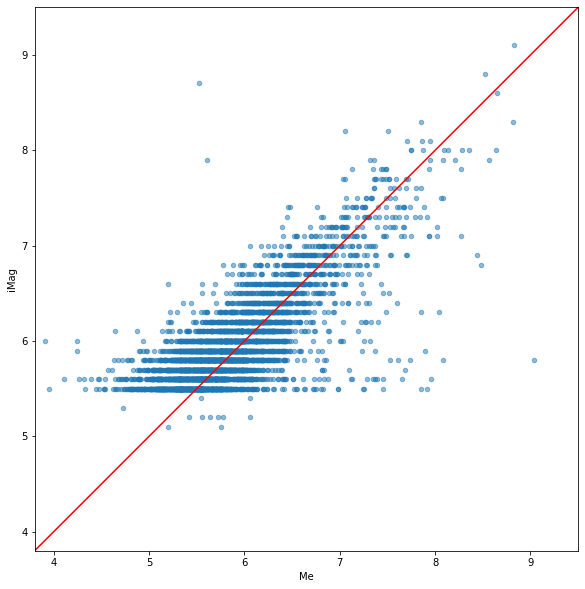

<Figure size 4000x4000 with 0 Axes>

In [18]:
# need to convert iMag to float
ax = df.plot.scatter(x='Me',y='iMag',alpha=0.5,xlim=[3.8,9.5],ylim=[3.8,9.5])
ax.set_aspect('equal', adjustable='box') # create square 
unity=np.linspace(1,10)
plt.plot(unity,unity,'r-')
plt.figure(figsize=(20,20), dpi= 200, facecolor='w', edgecolor='k')
plt.show()

## Tr vs TACER

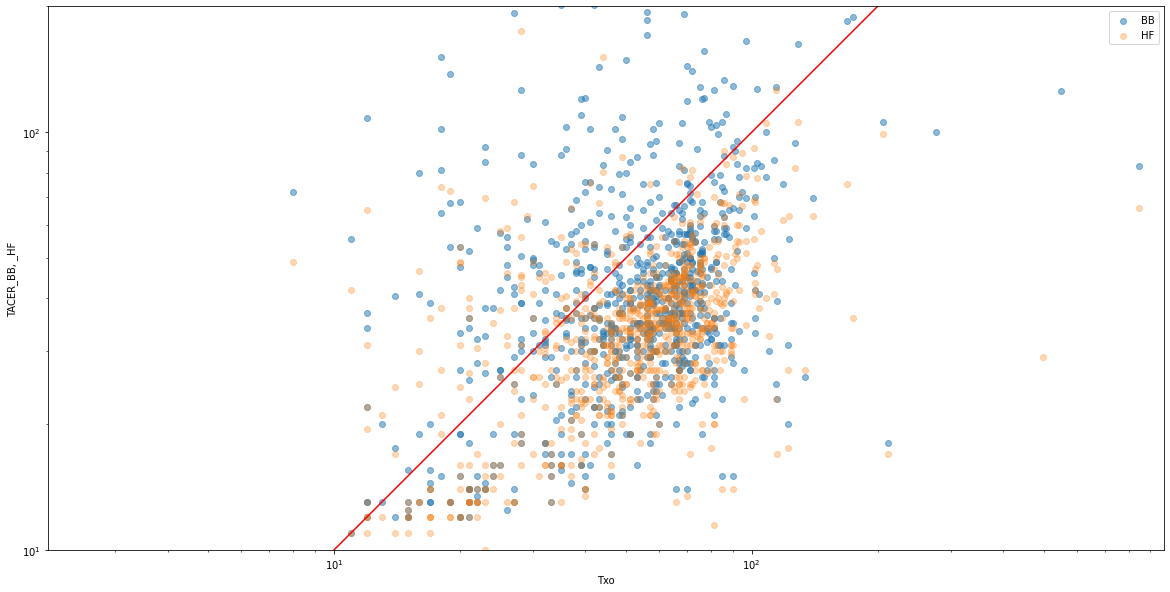

<Figure size 4000x4000 with 0 Axes>

In [19]:
# need to convert iMag to float
xmax=200
xmin=10
unity=np.linspace(xmin,xmax)

plt.scatter(df['Txo'],df['TACER_BB'],alpha=0.5, label="BB")
plt.scatter(df['Txo'],df['TACER_HF'],alpha=0.3, label="HF")


#plt.set_aspect('equal', adjustable='box') # create square 
plt.yscale('log')
plt.xscale('log')
plt.axis('equal')
plt.xlim([xmin, xmax])
plt.ylim([xmin, xmax])
plt.xlabel('Txo')
plt.ylabel('TACER_BB, _HF')
plt.legend()
plt.plot(unity,unity,'r-')

plt.figure(figsize=(20,20), dpi= 200, facecolor='w', edgecolor='k')

plt.show()

## TACER HF vs BB

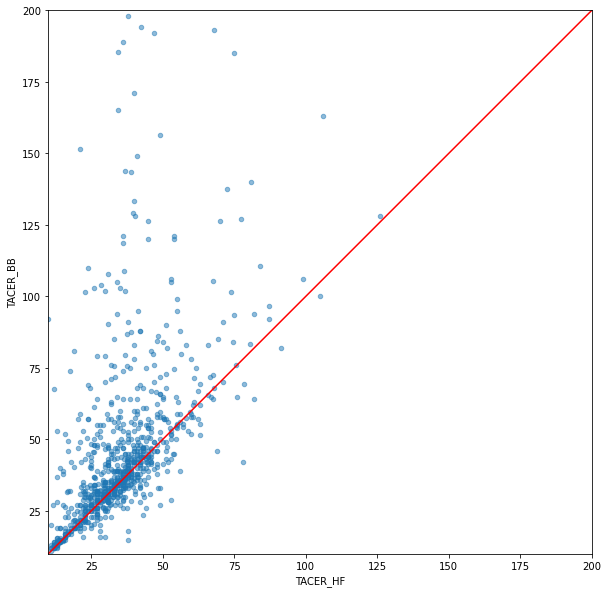

<Figure size 4000x4000 with 0 Axes>

In [20]:
# need to convert iMag to float
xmax=200
xmin=10
unity=np.linspace(xmin,xmax)

ax = df.plot.scatter(x='TACER_HF',y='TACER_BB',alpha=0.5,xlim=[xmin,xmax],ylim=[xmin,xmax])
ax.set_aspect('equal', adjustable='box') # create square 
plt.plot(unity,unity,'r-')
plt.figure(figsize=(20,20), dpi= 200, facecolor='w', edgecolor='k')
plt.show()

## Geographic plot of data


In [21]:
import geopandas
# really great guide here https://geopandas.org/docs/user_guide/mapping.html
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))


In [22]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [23]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


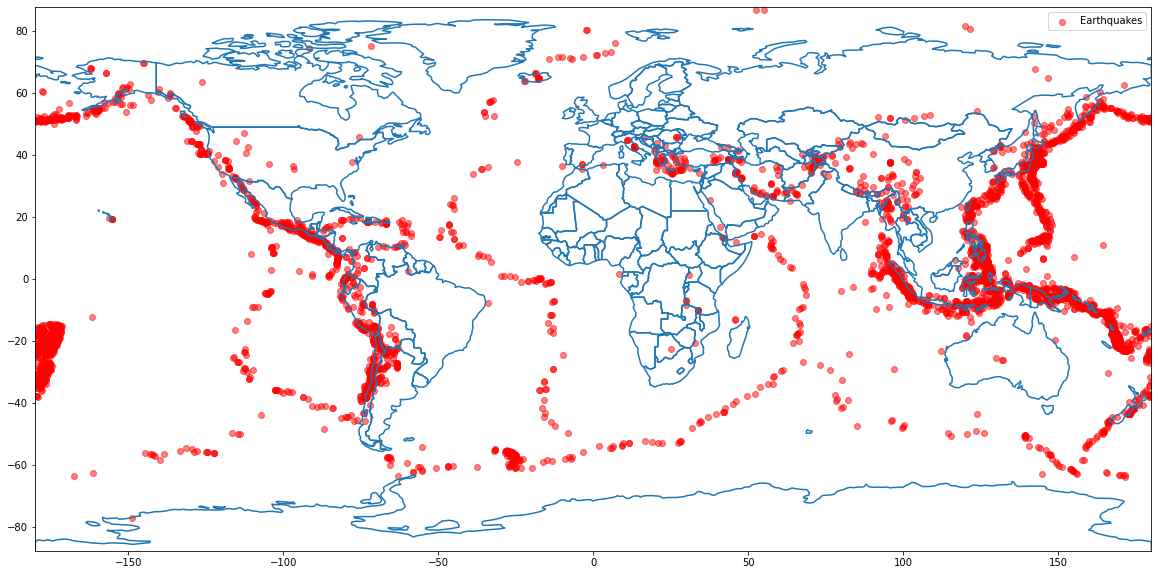

In [34]:
xmin=-180; xmax=180
ymin=-80; ymax=80

base = world.boundary.plot();
plt.scatter(df['Long'],df['Lat'],color='red', alpha=0.5, label='Earthquakes');
plt.axis('equal')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.legend()
plt.show()